In [ ]:
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D, LeakyReLU
from keras.layers import Dropout, Flatten, Dense, Input, Reshape, Activation
from keras.models import Sequential, Model
from keras.optimizers import Adam
from matplotlib import pyplot
from keras.datasets.mnist import load_data
import numpy as np
from keras.models import load_model
from numpy.random import randint
from numpy.random import randn

In [ ]:
(train_data, _), (_, _) = load_data()
np.random.shuffle(train_data)
sample_data = train_data.reshape(-1,28,28,1)
sample_data = sample_data.astype('float32')
sample_data = sample_data / 255.0
sample_data.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

In [ ]:
latent_dim = 100
inp_x = Input(shape=(100,))
x = Dense(32*7*7)(inp_x)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7,7,32))(x)
x = Conv2DTranspose(32,(4,4),strides=(2,2),padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2DTranspose(32,(4,4),strides=(2,2),padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2D(1,(7,7), activation='sigmoid', padding='same')(x)
gen_model  = Model(inputs=inp_x,outputs=x)
gen_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 1568)              158368    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1568)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        16416     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)       

In [ ]:
inp_y = Input((28,28,1))
y = Conv2D(16, (3,3),strides=(2,2),padding='same')(inp_y)
y = LeakyReLU(alpha=0.2)(y)
y = Dropout(0.4)(y)
y = Conv2D(16, (3,3), strides=(2,2),padding='same')(y)
y = LeakyReLU(alpha=0.2)(y)
y = Conv2D(16, (3,3), strides=(2,2),padding='same')(y)
y = LeakyReLU(alpha=0.2)(y)
y = Dropout(0.4)(y)
y = Flatten()(y)
y = Dense(1, activation='sigmoid')(y)
disc_model  = Model(inputs=inp_y,outputs=y)
disc_model.summary()
opt = Adam(lr=0.0002)
disc_model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)         

In [ ]:
def create_final_model(gen_m, disc_m):
  disc_model.trainable = False
  final_model  = Sequential()
  final_model.add(gen_m)
  final_model.add(disc_m)
  final_model.summary()
  opt = Adam(lr=0.0002)
  final_model.compile(loss='binary_crossentropy',optimizer=opt)
  return final_model

In [ ]:
def plt_func(epoch, gen_model_tmp, disc_model_temp, sample_data_tmp, latent_dim, real_acc_history, fake_acc_history, n_samples=100):
  # Generating real and fake samples
  X_real = sample_data_tmp[randint(0, sample_data_tmp.shape[0], n_samples)]
  y_real = np.ones((n_samples, 1))

  x_temp = randn(latent_dim * n_samples).reshape(n_samples, latent_dim)
  X_fake = gen_model_tmp.predict(x_temp)
  y_fake = np.zeros((n_samples, 1))

  # evaluating accuracies for real and fake images
  _, real_accuracy = disc_model_temp.evaluate(X_real, y_real)
  _, fake_accuracy = disc_model_temp.evaluate(X_fake, y_fake)
  print ("Real images Accuracy: " + str(real_accuracy) +", Fake images accuracy: " + str(fake_accuracy))

  real_acc_history.append(real_accuracy)
  fake_acc_history.append(fake_accuracy)

  for i in range(16):
    pyplot.subplot(4,4,i+1)
    pyplot.axis('off')
    pyplot.imshow(X_fake[i,:,:,0], cmap='gray_r')
  pyplot.show()
 # pyplot.savefig("generated_images_%d.png"%(epoch))
 # pyplot.close()
  # g_model.save("generator_model_%d.h5"%(epoch))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 28, 28, 1)         192769    
_________________________________________________________________
functional_3 (Functional)    (None, 1)                 5057      
Total params: 197,826
Trainable params: 192,769
Non-trainable params: 5,057
_________________________________________________________________
4/4 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 1.0000
Real images Accuracy: 1.0, Fake images accuracy: 1.0


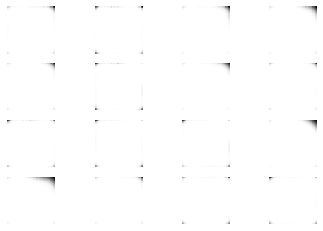

4/4 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.9600
Real images Accuracy: 0.7699999809265137, Fake images accuracy: 0.9599999785423279


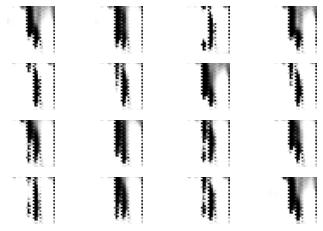

4/4 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 1.0000
Real images Accuracy: 0.800000011920929, Fake images accuracy: 1.0


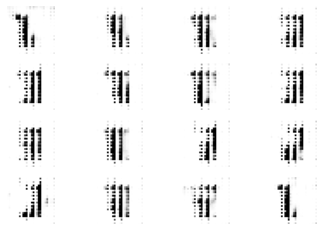

4/4 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5600
Real images Accuracy: 0.550000011920929, Fake images accuracy: 0.5600000023841858


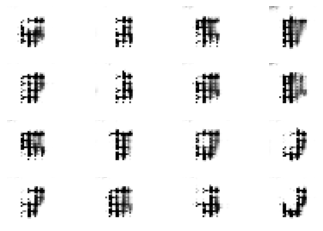

4/4 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.8100
Real images Accuracy: 0.6899999976158142, Fake images accuracy: 0.8100000023841858


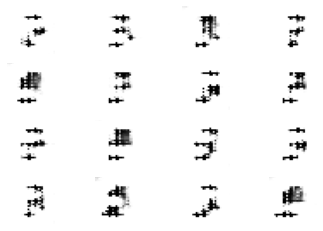

4/4 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.1200
Real images Accuracy: 0.800000011920929, Fake images accuracy: 0.11999999731779099


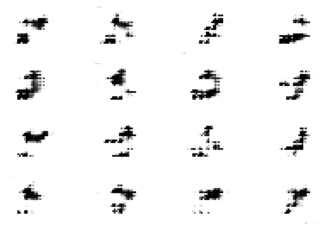

4/4 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5500
Real images Accuracy: 0.27000001072883606, Fake images accuracy: 0.550000011920929


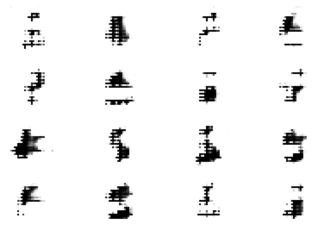

4/4 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.8500
Real images Accuracy: 0.05000000074505806, Fake images accuracy: 0.8500000238418579


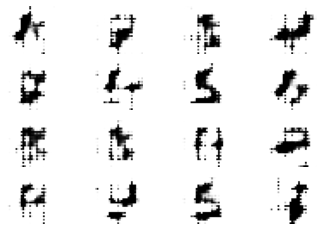

4/4 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.8000
Real images Accuracy: 0.07000000029802322, Fake images accuracy: 0.800000011920929


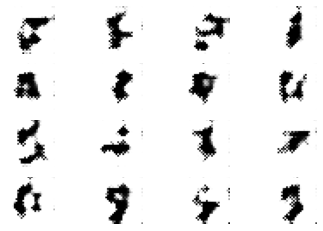

4/4 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.9500
Real images Accuracy: 0.2199999988079071, Fake images accuracy: 0.949999988079071


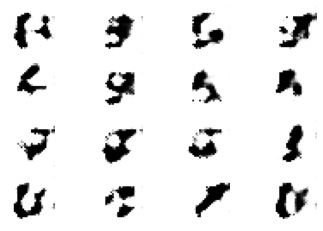

4/4 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4900
Real images Accuracy: 0.8899999856948853, Fake images accuracy: 0.49000000953674316


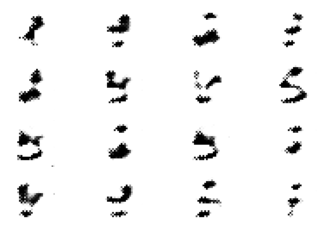

4/4 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6900
Real images Accuracy: 0.5899999737739563, Fake images accuracy: 0.6899999976158142


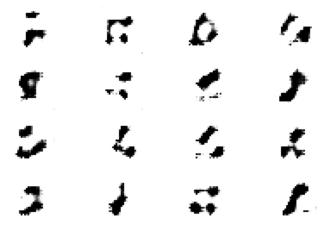

4/4 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.9100
Real images Accuracy: 0.75, Fake images accuracy: 0.9100000262260437


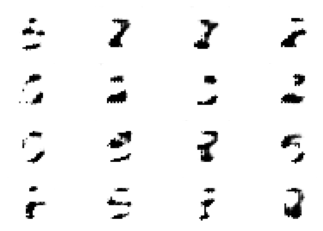

4/4 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5600
Real images Accuracy: 1.0, Fake images accuracy: 0.5600000023841858


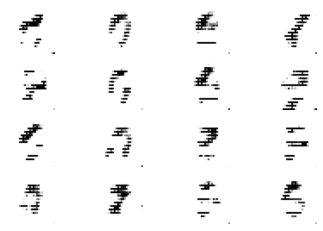

4/4 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.8700
Real images Accuracy: 0.9599999785423279, Fake images accuracy: 0.8700000047683716


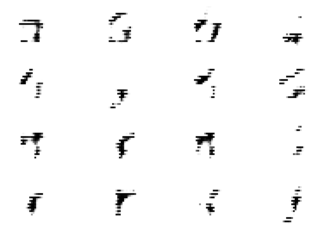

4/4 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.7400
Real images Accuracy: 0.7400000095367432, Fake images accuracy: 0.7400000095367432


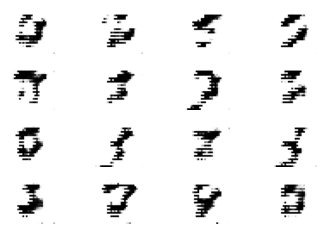

4/4 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6500
Real images Accuracy: 0.7099999785423279, Fake images accuracy: 0.6499999761581421


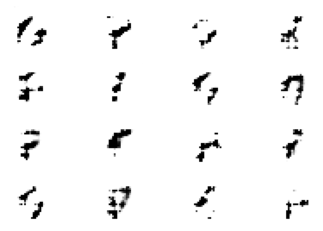

4/4 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.7400
Real images Accuracy: 0.7300000190734863, Fake images accuracy: 0.7400000095367432


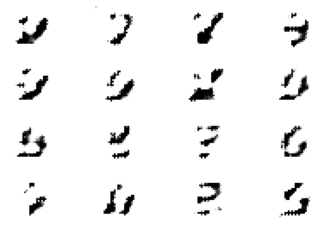

4/4 [==============================] - 0s 2ms/step - loss: 0.7177 - accuracy: 0.4000
Real images Accuracy: 0.9100000262260437, Fake images accuracy: 0.4000000059604645


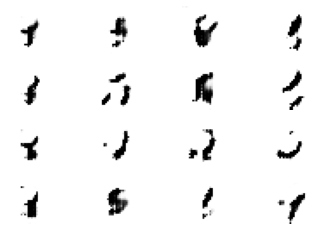

4/4 [==============================] - 0s 2ms/step - loss: 0.7135 - accuracy: 0.3200
Real images Accuracy: 0.949999988079071, Fake images accuracy: 0.3199999928474426


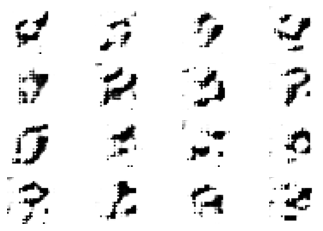

4/4 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.4400
Real images Accuracy: 0.7200000286102295, Fake images accuracy: 0.4399999976158142


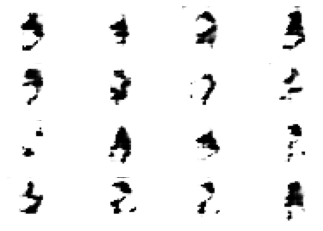

4/4 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.8000
Real images Accuracy: 0.6000000238418579, Fake images accuracy: 0.800000011920929


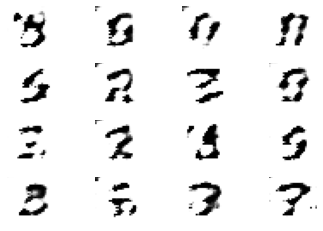

4/4 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.4500
Real images Accuracy: 0.550000011920929, Fake images accuracy: 0.44999998807907104


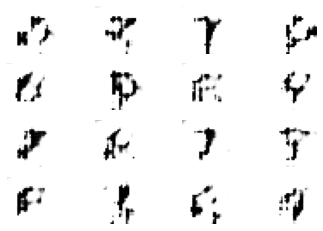

4/4 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 1.0000
Real images Accuracy: 0.0, Fake images accuracy: 1.0


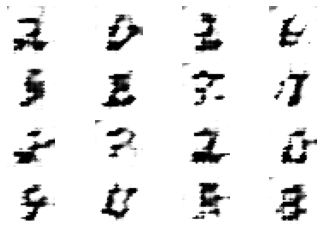

4/4 [==============================] - 0s 2ms/step - loss: 0.7343 - accuracy: 0.0100
Real images Accuracy: 0.7599999904632568, Fake images accuracy: 0.009999999776482582


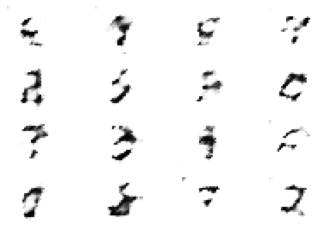

4/4 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.8600
Real images Accuracy: 0.3100000023841858, Fake images accuracy: 0.8600000143051147


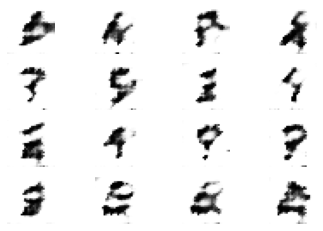

4/4 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.2400
Real images Accuracy: 0.75, Fake images accuracy: 0.23999999463558197


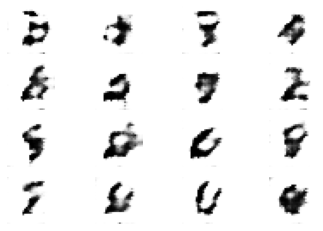

4/4 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.8900
Real images Accuracy: 0.3499999940395355, Fake images accuracy: 0.8899999856948853


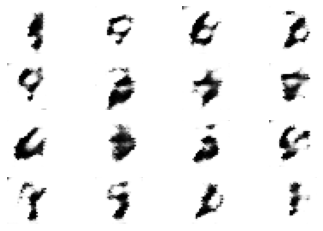

4/4 [==============================] - 0s 2ms/step - loss: 0.7641 - accuracy: 0.0000e+00
Real images Accuracy: 0.9599999785423279, Fake images accuracy: 0.0


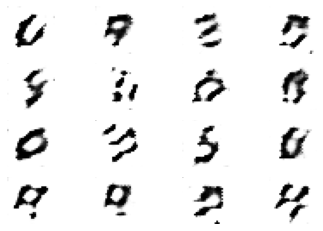

4/4 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.9100
Real images Accuracy: 0.23999999463558197, Fake images accuracy: 0.9100000262260437


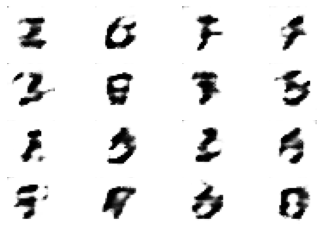

4/4 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.0900
Real images Accuracy: 0.8500000238418579, Fake images accuracy: 0.09000000357627869


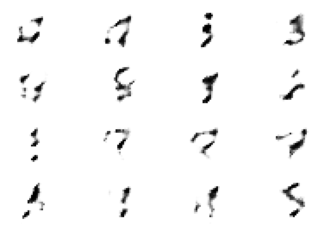

4/4 [==============================] - 0s 2ms/step - loss: 0.7293 - accuracy: 0.0300
Real images Accuracy: 0.7900000214576721, Fake images accuracy: 0.029999999329447746


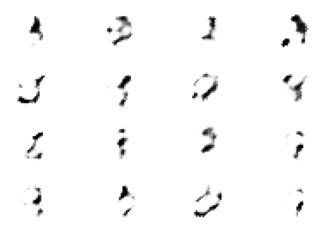

4/4 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.4200
Real images Accuracy: 0.6200000047683716, Fake images accuracy: 0.41999998688697815


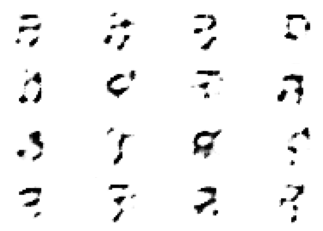

4/4 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.3300
Real images Accuracy: 0.6899999976158142, Fake images accuracy: 0.33000001311302185


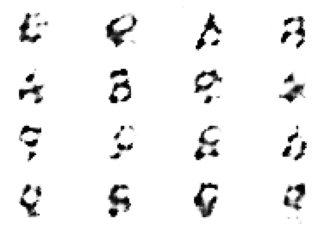

4/4 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.6200
Real images Accuracy: 0.5600000023841858, Fake images accuracy: 0.6200000047683716


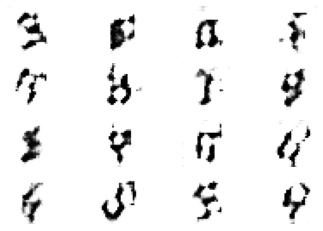

4/4 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.7500
Real images Accuracy: 0.30000001192092896, Fake images accuracy: 0.75


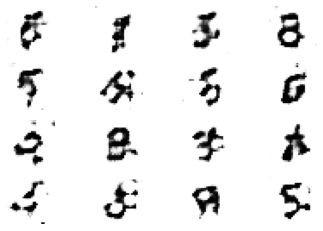

4/4 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.8800
Real images Accuracy: 0.33000001311302185, Fake images accuracy: 0.8799999952316284


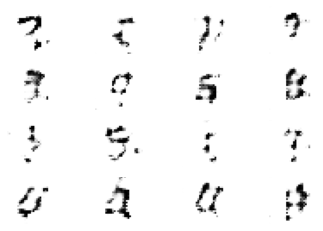

4/4 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.0600
Real images Accuracy: 0.9100000262260437, Fake images accuracy: 0.05999999865889549


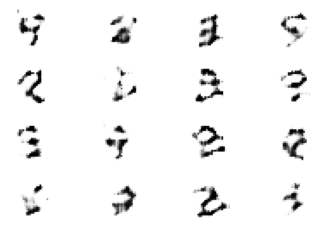

4/4 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.2300
Real images Accuracy: 0.7300000190734863, Fake images accuracy: 0.23000000417232513


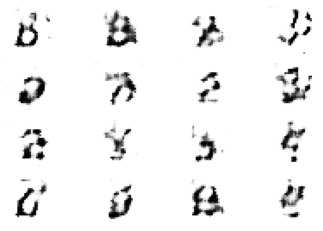

4/4 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.8700
Real images Accuracy: 0.03999999910593033, Fake images accuracy: 0.8700000047683716


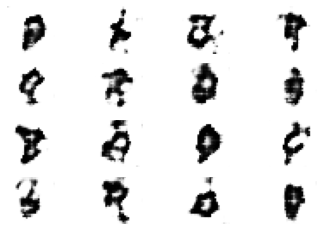

4/4 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.9400
Real images Accuracy: 0.019999999552965164, Fake images accuracy: 0.9399999976158142


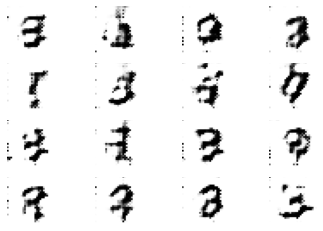

4/4 [==============================] - 0s 2ms/step - loss: 0.7226 - accuracy: 0.2400
Real images Accuracy: 0.6600000262260437, Fake images accuracy: 0.23999999463558197


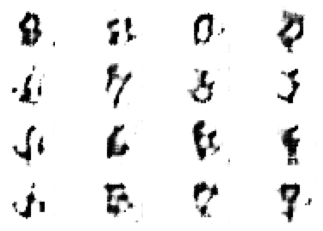

4/4 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.8100
Real images Accuracy: 0.6000000238418579, Fake images accuracy: 0.8100000023841858


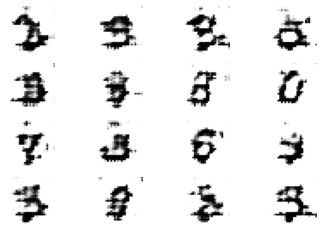

4/4 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.7300
Real images Accuracy: 0.05999999865889549, Fake images accuracy: 0.7300000190734863


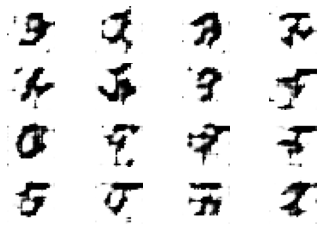

4/4 [==============================] - 0s 3ms/step - loss: 0.7380 - accuracy: 0.0600
Real images Accuracy: 0.9200000166893005, Fake images accuracy: 0.05999999865889549


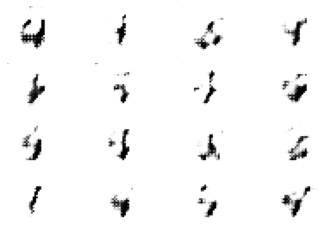

4/4 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.8300
Real images Accuracy: 0.3799999952316284, Fake images accuracy: 0.8299999833106995


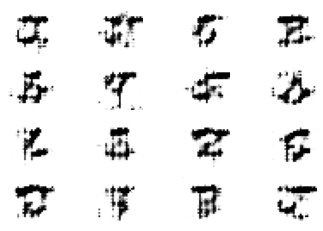

4/4 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.9400
Real images Accuracy: 0.12999999523162842, Fake images accuracy: 0.9399999976158142


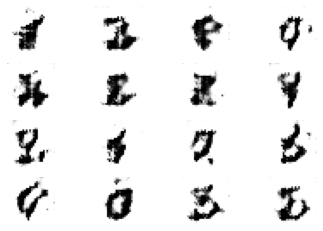

4/4 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.0800
Real images Accuracy: 0.9300000071525574, Fake images accuracy: 0.07999999821186066


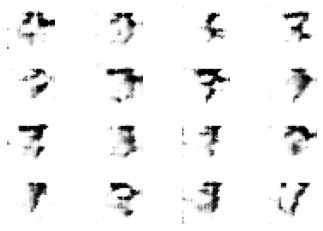

4/4 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.9300
Real images Accuracy: 0.8500000238418579, Fake images accuracy: 0.9300000071525574


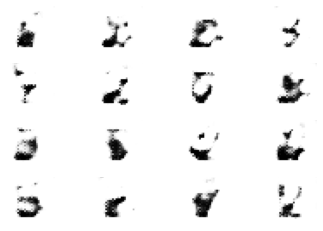

4/4 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.4300
Real images Accuracy: 0.5899999737739563, Fake images accuracy: 0.4300000071525574


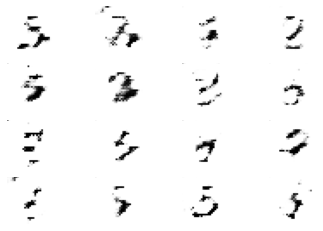

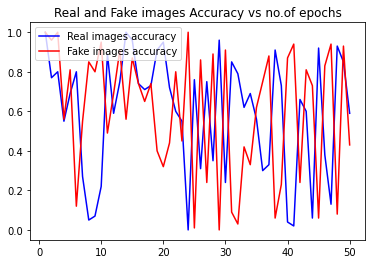

In [ ]:
n_epochs = 50
batch_size = 256
half_batch = int(batch_size / 2)
n_iterations = int(sample_data.shape[0] / batch_size)

real_final_model = create_final_model(gen_model, disc_model)
real_acc_history, fake_acc_history = [], []
for i in range(n_epochs): 
  np.random.shuffle(sample_data)
  # enumerate batches over the training set
  for j in range(n_iterations): 
    X_real = sample_data[j*half_batch:j*half_batch + half_batch]
    
    x_temp = np.random.randn(latent_dim * half_batch).reshape(half_batch, latent_dim)
    X_fake = gen_model.predict(x_temp)

    X = np.concatenate((X_real,X_fake))
    y = np.concatenate((np.ones((half_batch)),np.zeros((half_batch))))
    disc_loss, _ = disc_model.train_on_batch(X, y)

    X_gan = np.random.randn(latent_dim * batch_size).reshape(batch_size, latent_dim)
    y_gan = np.ones((batch_size, 1))
		# update the generator via the discriminator's error
    gan_loss = real_final_model.train_on_batch(X_gan, y_gan)
    
  plt_func(i, gen_model, disc_model, sample_data, latent_dim, real_acc_history, fake_acc_history)
    
pyplot.plot(range(1,n_epochs+1), real_acc_history, "-b", label="Real images accuracy")
pyplot.plot(range(1,n_epochs+1), fake_acc_history, "-r", label="Fake images accuracy")
pyplot.legend(loc="upper left")
pyplot.title("Real and Fake images Accuracy vs no.of epochs")
pyplot.show()
